In [1]:
import optuna
import h5py    
from numba import jit
import numpy as np    
import os
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
import time
from time import time
from scipy.stats import pearsonr
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import ElasticNet
from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn  import metrics
from sklearn import datasets, linear_model, svm
from sklearn.model_selection import train_test_split, cross_val_score
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import sys
import warnings

#import lightgbm as lgb
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import seaborn as sns

from scipy.stats import skew
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.svm import SVR
#from xgboost import XGBRegressor
def distribution_plot(data,title,method):
    title = 'Distribution of Subjects Age '+title
    fname = method+'/' +title
    ax = sns.histplot(data,kde=True,bins = 20).set(title=title)
    plt.tight_layout()
    plt.savefig(fname)
    plt.clf()
    return ax

def all_metrics_to_file(test,pred_test,val,pred_val,method = 'ML',data = 'Whole Control',fileOut = 'MLResults.csv', save_metrics = True):
    mae = mean_absolute_error(test, pred_test)
    ev = explained_variance_score(test, pred_test)
    cor_p = pearsonr(test, pred_test)[0]
    r2_val = cor_p**2
    id_name = method + ' Test'
    print("\tTest Explained variance:", ev)
    print("\tTest Mean absolute error:", mae)
    print("\tTest Correlation:", cor_p)
    print("\tTest R2 score:", r2_val)
    print()
    res_df_test = pd.DataFrame(data = [method,mae,ev,cor_p,r2_val,data],index=['Method','Mean Absolute Error','Explained Variance','Correlation','R2 Score','Dataset Used'],columns = ['Test'])
    res_df_test = res_df_test.T
    mae_v = mean_absolute_error(val, pred_val)
    ev_v = explained_variance_score(val, pred_val)
    cor_p_v = pearsonr(val, pred_val)[0]
    r2_val_v = cor_p**2
    id_name = method + ' Validation'
    print("\tValidation Explained variance:", ev_v)
    print("\tValidation Mean absolute error:", mae_v)
    print("\tValidation Correlation:", cor_p_v)
    print("\tValidation R2 score:", r2_val_v)
    print()
    res_df_val = pd.DataFrame(data = [method,mae_v,ev_v,cor_p_v,r2_val_v,data],index=['Method','Mean Absolute Error','Explained Variance','Correlation','R2 Score','Dataset Used'],columns = ['Validation'])
    res_df_val = res_df_val.T
    final_res = pd.concat([res_df_test,res_df_val])
    if save_metrics:
        final_res.to_csv(fileOut, mode='a', header=not os.path.exists(fileOut))

def scat_plot(yt_pred,y_test,yv_pred,y_valid,title,method):
    title2 = 'Test Subjects '+title
    fname = method+'/Test_' +title
    data = pd.DataFrame(data = [list(yt_pred),list(y_test)], index=['Predicted','Test'])
    data = data.transpose()
    ax = sns.regplot(x='Predicted',y='Test',data = data).set(title=title2,xlim = (35,80),ylim = (35,80))
    plt.tight_layout()
    plt.savefig(fname)
    plt.clf()
    title_2 = 'Validation Subjects '+title
    fname = method+'/Valid_' +title
    data = pd.DataFrame(data = [list(yv_pred),list(y_valid)], index=['Predicted','Validation'])
    data = data.transpose()
    ax2 = sns.regplot(x='Predicted',y='Validation',data = data).set(title=title2,xlim = (35,80),ylim = (35,80))
    plt.tight_layout()
    plt.savefig(fname)
    plt.clf()
    return ax,ax2


from sklearn.metrics import accuracy_score, f1_score,confusion_matrix,recall_score,precision_score,log_loss,roc_auc_score,roc_curve

### UKBB Dataset

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


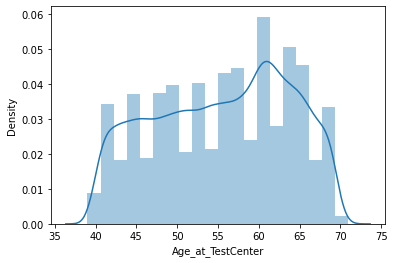

In [2]:


mri_roi = pd.read_csv('Data/ProcessedMRI_ROI.csv',index_col = 'Unnamed: 0')
subjects_to_test = list(mri_roi.index)

x = pd.read_csv('Data/First_Time_Point_Metabolomics_Control.csv',index_col = 'eid')
x = np.log2(np.exp(x))
y = pd.read_csv('Data/First_Time_Point_Demographics_Control.csv',index_col = 'eid')
#Coding	Meaning
#0	Female
#1	Male

sns.distplot(y.loc[:,'Age_at_TestCenter'],kde=True,bins = 20)
y = pd.read_csv('Data/First_Time_Point_Demographics_Control.csv',index_col = 'eid')
y_ukbb_male = y[y.Sex == 1].Age_at_TestCenter
y_ukbb_female = y[y.Sex == 0].Age_at_TestCenter

x_ukbb_male = x[x.index.isin(y_ukbb_male.index)]
x_ukbb_female = x[x.index.isin(y_ukbb_female.index)]

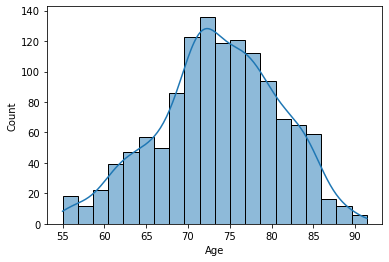

In [3]:

import itertools
adni_met = pd.read_csv('ADNI_Rearranged_New_Input_data.csv')
subj_info = pd.read_csv('SubjectId_ADNI.csv')
adni_met = adni_met.transpose()
import random
random.seed(42)
adni_dem = pd.read_csv('ADNI_Demographics.csv')
out_og = adni_dem[list(adni_dem.Diagnosis.isin(['Controls','LMCI','EMCI','AD']))]
#out_og_ = out_og[(out_og['age'] > 40) & (out_og['age'] < 70)]

subj_info['Age'] = 0
subj_info['Sex'] = 'female'
subj_info['Diagnosis'] = 'Controls'
for i in adni_dem.RID:
    temp_idx = subj_info.RID == i
    baseline_idx_w_dem = subj_info.VISCODE2 == 'bl'
    baseline_idx_w_dem = [a and b for a, b in zip(temp_idx, baseline_idx_w_dem)]
    baseline_idx_n_dem = [a and b for a, b in zip(temp_idx, subj_info.VISCODE2 != 'bl')]

    subj_info.loc[baseline_idx_w_dem,'Age'] = float(list(adni_dem.age[adni_dem.RID == i])[0])
    subj_info.loc[baseline_idx_w_dem,'Sex'] = list(adni_dem.Sex[adni_dem.RID == i])[0]
    subj_info.loc[baseline_idx_w_dem,'Diagnosis']  = list(adni_dem.Diagnosis[adni_dem.RID == i])[0]
    for k in list(subj_info[baseline_idx_n_dem].index):
        subj_info.loc[k,'Age'] = float(list(adni_dem.age[adni_dem.RID == i])[0]) + int(subj_info.VISCODE2[k].split('m')[1])/12
        subj_info.loc[k,'Sex'] = list(adni_dem.Sex[adni_dem.RID == i])[0]
        subj_info.loc[k,'Diagnosis']  = list(adni_dem.Diagnosis[adni_dem.RID == i])[0]
    
    
subj_info_1 = subj_info.loc[list(subj_info.RID.isin(out_og.RID)),:]
#subj_info_2 = subj_info_1[list(subj_info_1.RID.isin(out_og_.RID))]
subj_info_2 = subj_info_1[list(subj_info_1.VISCODE2 == 'bl')]
#subj_info_2 = subj_info_1
index_control = subj_info_2.index
adni_controls = adni_met.loc[list(subj_info_2.Sample_id),:]


out_og = subj_info_2['Age']
out_og.index = subj_info_2['RID']
sns.histplot(out_og,kde=True,bins = 20)

male_adni_x = adni_controls[adni_controls.index.isin(subj_info_2.Sample_id[subj_info_2.Sex == 'Male'])]
female_adni_x = adni_controls[adni_controls.index.isin(subj_info_2.Sample_id[subj_info_2.Sex == 'Female'])]

male_adni_y = subj_info_2[subj_info_2.Sample_id.isin(male_adni_x.index)]
female_adni_y = subj_info_2[subj_info_2.Sample_id.isin(female_adni_x.index)]

male_adni_x_controls = male_adni_x[male_adni_x.index.isin(male_adni_y.Sample_id[male_adni_y.Diagnosis == 'Controls'])]
female_adni_x_controls = female_adni_x[female_adni_x.index.isin(female_adni_y.Sample_id[female_adni_y.Diagnosis == 'Controls'])]

male_adni_y = subj_info_2[subj_info_2.Sample_id.isin(male_adni_x.index)].Age
female_adni_y = subj_info_2[subj_info_2.Sample_id.isin(female_adni_x.index)].Age


In [4]:
# Normalization process is done with the ADNI controls only

scaler = StandardScaler().fit(male_adni_x_controls)
normalized_male_adni_x = pd.DataFrame(
  scaler.transform(male_adni_x),
  columns = male_adni_x_controls.columns
  )
normalized_female_adni_x = pd.DataFrame(
  scaler.transform(female_adni_x),
  columns = male_adni_x_controls.columns
  )

## Male Subject Model

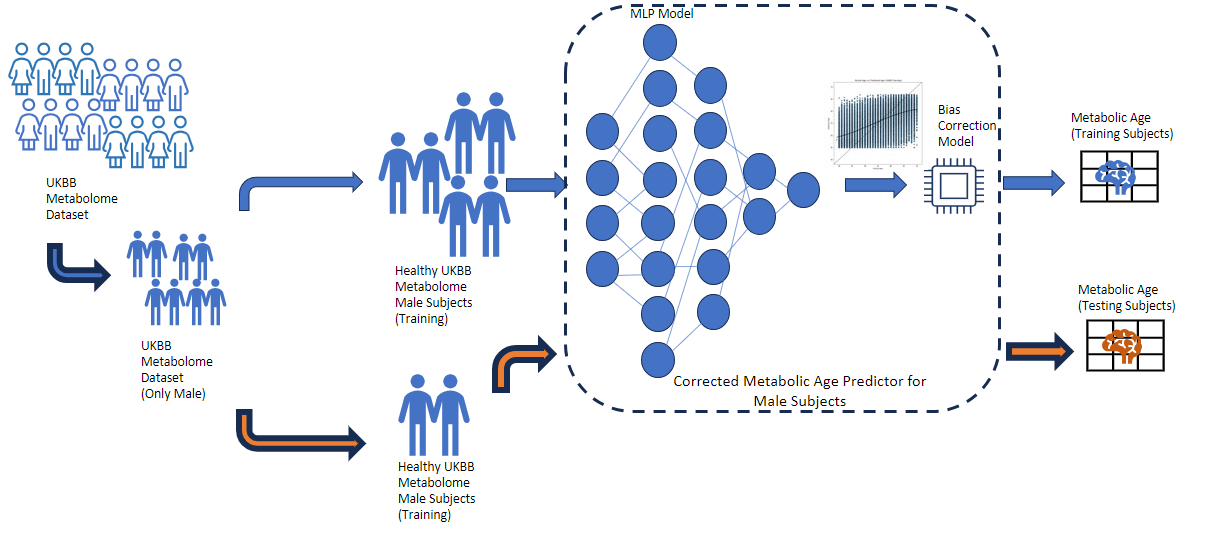

In [5]:
from IPython.display import Image
Image(filename="Model_Desc1.png")


In [6]:
bins = np.linspace(0, len(y_ukbb_male),20)
y_binned = np.digitize(y_ukbb_male, bins)
scaler = StandardScaler().fit(x_ukbb_male)
X_male_ukbb_train, X_male_ukbb_test, Y_male_ukbb_train, Y_male_ukbb_test = train_test_split(x_ukbb_male, y_ukbb_male,
        test_size=0.1, shuffle = True, random_state = 42,stratify=y_binned)

bins = np.linspace(0, len(Y_male_ukbb_train),20)
y_binned = np.digitize(Y_male_ukbb_train, bins)
X_male_ukbb_train, X_male_ukbb_val, Y_male_ukbb_train, Y_male_ukbb_val = train_test_split(X_male_ukbb_train, Y_male_ukbb_train,
        test_size=0.1, shuffle = True, random_state = 42,stratify=y_binned)

normalized_X_male_ukbb_train = pd.DataFrame(
  scaler.transform(X_male_ukbb_train),
  columns = x_ukbb_male.columns
  )
normalized_X_male_ukbb_test = pd.DataFrame(
  scaler.transform(X_male_ukbb_test),
  columns = x_ukbb_male.columns
  )
normalized_X_male_ukbb_val = pd.DataFrame(
  scaler.transform(X_male_ukbb_val),
  columns = x_ukbb_male.columns
  )

In [7]:
len(Y_male_ukbb_train)

26146

### Prepping the model

In [20]:
def mlp_regressor_objective(trial):
    hidden_layers = trial.suggest_categorical("hidden_layer_sizes", [(50,100),(100,100),(50,75,100),(25,75,100),(25,50,75,100)])
    activation = trial.suggest_categorical("activation", ["relu", "identity"])
    #solver = trial.suggest_categorical("solver", ["sgd", "adam"])
    momentum = trial.suggest_float('momentum',0.2,0.9)
    learning_rate = trial.suggest_categorical("learning_rate", ['constant', 'invscaling', 'adaptive'])
    learning_rate_init = trial.suggest_float("learning_rate_init", 0.001, 0.1)

    ## Create Model
    mlp_regressor = MLPRegressor(
                            hidden_layer_sizes=hidden_layers,
                            activation=activation,
                            #solver=solver,
                            momentum = momentum,
                            learning_rate=learning_rate,
                            learning_rate_init=learning_rate_init,
                            #early_stopping=True
                            )
    ## Fit Model

    mlp_regressor.fit(normalized_X_male_ukbb_train,Y_male_ukbb_train)

    mae = mean_absolute_error(Y_male_ukbb_val, mlp_regressor.predict(normalized_X_male_ukbb_val))

    return mae

studymlp = optuna.create_study(direction="minimize")
studymlp.optimize(mlp_regressor_objective, n_trials=500)

[I 2023-10-04 10:41:33,421] A new study created in memory with name: no-name-e08017b8-7b31-42c7-9050-259dae03595b
C:\Users\ppugale\AppData\Roaming\Python\Python38\site-packages\optuna\distributions.py:427: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 100) which is of type tuple.
  warnings.warn(message)
C:\Users\ppugale\AppData\Roaming\Python\Python38\site-packages\optuna\distributions.py:427: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100, 100) which is of type tuple.
  warnings.warn(message)
C:\Users\ppugale\AppData\Roaming\Python\Python38\site-packages\optuna\distributions.py:427: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 75, 100) which is of type tuple.
  warnings.warn(message)
C:\Users

In [21]:
studymlp.best_params

{'hidden_layer_sizes': (25, 50, 75, 100),
 'activation': 'relu',
 'momentum': 0.320464912514306,
 'learning_rate': 'adaptive',
 'learning_rate_init': 0.012975784121150543}

In [22]:
studymlp.best_value

5.489151431722159

 Trial 192 finished with value: 5.6281900759237455 and   
 parameters: {'hidden_layer_sizes': (25, 50, 75, 100), 'activation': 'relu', 'learning_rate': 'adaptive', 'learning_rate_init': 0.009288778614695327}.
            Best is trial 192 with value: 5.6281900759237455.

In [34]:
## Running the best model for male

best_mlp_male_model = MLPRegressor(
                            hidden_layer_sizes=(25, 50, 75, 100),
                            activation='relu',
                            momentum= 0.320464912514306,
                            learning_rate='adaptive',
                            learning_rate_init=0.012975784121150543,random_state=42
                            #early_stopping=True
                            )

best_mlp_male_model.fit(normalized_X_male_ukbb_train,Y_male_ukbb_train)
import scipy
print('Pearson correlation for validation:',scipy.stats.pearsonr(Y_male_ukbb_val, best_mlp_male_model.predict(normalized_X_male_ukbb_val))[0])
print('Mean Absolute Error for validation:',mean_absolute_error(Y_male_ukbb_val, best_mlp_male_model.predict(normalized_X_male_ukbb_val)))

print('Pearson correlation for test:',scipy.stats.pearsonr(Y_male_ukbb_test, best_mlp_male_model.predict(normalized_X_male_ukbb_test))[0])
print('Mean Absolute Error for test:',mean_absolute_error(Y_male_ukbb_test, best_mlp_male_model.predict(normalized_X_male_ukbb_test)))


Pearson correlation for validation: 0.5315284086192675
Mean Absolute Error for validation: 5.756314216034692
Pearson correlation for test: 0.5106980083367736
Mean Absolute Error for test: 5.952530850547572


In [21]:
pip install --user shap

  Using cached shap-0.43.0-cp38-cp38-win_amd64.whl (447 kB)
  Using cached packaging-23.2-py3-none-any.whl (53 kB)
Note: you may need to restart the kernel to use updated packages.


In [22]:

import shap
explainer = shap.KernelExplainer(best_mlp_male_model.predict,normalized_X_male_ukbb_test)
shap_values = explainer.shap_values(normalized_X_male_ukbb_test,)

Using 3228 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/3228 [00:00<?, ?it/s]

Text(0.5, 1.0, ' Actual Age vs Predicted Age (Male UKBB Training)')

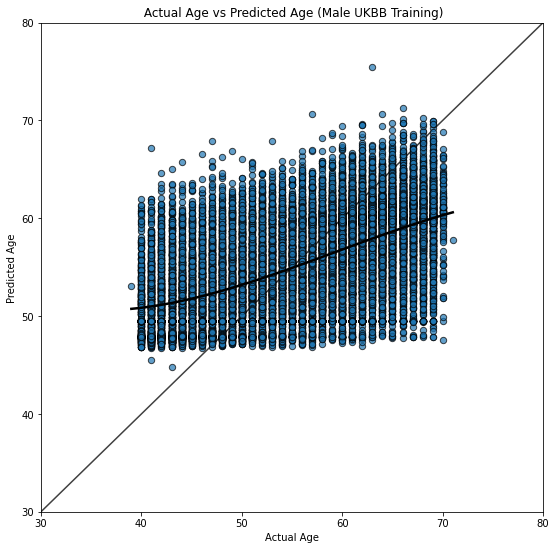

In [35]:
fig, ax = plt.subplots(figsize = (9, 9))
training_age_t = Y_male_ukbb_train
training_age_p1 = best_mlp_male_model.predict(normalized_X_male_ukbb_train)

ax.scatter(training_age_t,
                  training_age_p1,s=40, alpha=0.7, edgecolors="k")
d, c, b, a = np.polyfit(training_age_t,
                  training_age_p1,deg=3)

xseq = np.linspace(min(training_age_t),np.max(training_age_t), num=100)
ax.plot(xseq, a + b * xseq + c*(xseq**2) +d*(xseq**3), color="k", lw=2.5)
ax.plot([30,80], [30,80], 'k-', alpha=0.75, zorder=0)
plt.xlabel('Actual Age')
plt.ylabel('Predicted Age')
plt.xlim([30,80])
plt.ylim([30,80])
plt.title(' Actual Age vs Predicted Age (Male UKBB Training)')

In [36]:
## Obtaining difference age_p2

def bias_correction(age_t,age_p1, degree, title_set = 'Male UKBB Subjects'):
    
    b_model = np.polyfit(age_t,age_p1,deg=degree)
    b_model_out = np.poly1d(b_model)
    age_p2 = []
    for i in range(0,len(age_t)):
        age_p2.append(b_model_out(age_t[i]))
    ## Using formula for predited Age correction --> age_pc
    # age_pc = age_p1 - age_p2 + age_t
    age_pc = []
    for i in range(0,len(age_t)):
        age_pc.append(age_p1[i] - age_p2[i] + age_t[i])
    
    fig, ax = plt.subplots(figsize = (9, 9))
    ax.scatter(age_t,age_pc,s=40, alpha=0.7, edgecolors="k")
    #ax.plot(xseq, a + b * xseq + c*(xseq**2) +d*(xseq**3), color="k", lw=2.5)
    ax.plot([38,72], [38,72], 'k-', alpha=0.75, zorder=0)
    plt.xlabel('Actual Age')
    plt.ylabel('Corrected Predicted Age')
    sts= "Mean Absolute Error " + str(round(mean_absolute_error(age_t, age_pc),3))
    plt.text(55, 40, sts, fontsize = 14)
    sts= "Corrected Polynomial Degree " + str(degree)
    plt.text(55, 38, sts, fontsize = 14)
    plt.title(' Actual Age vs Corrected Predicted Age '+title_set)
    
    return age_pc,b_model_out

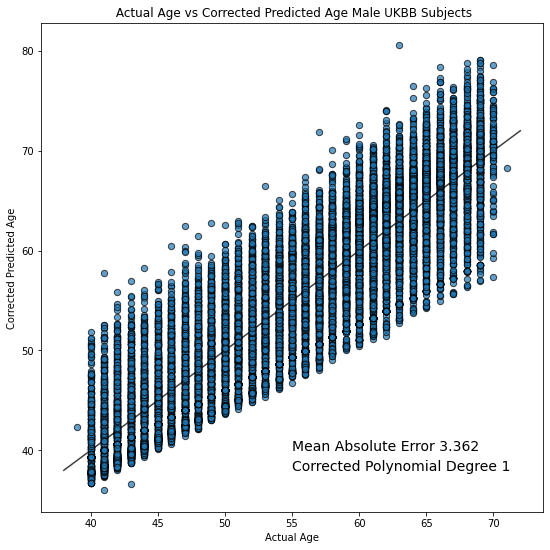

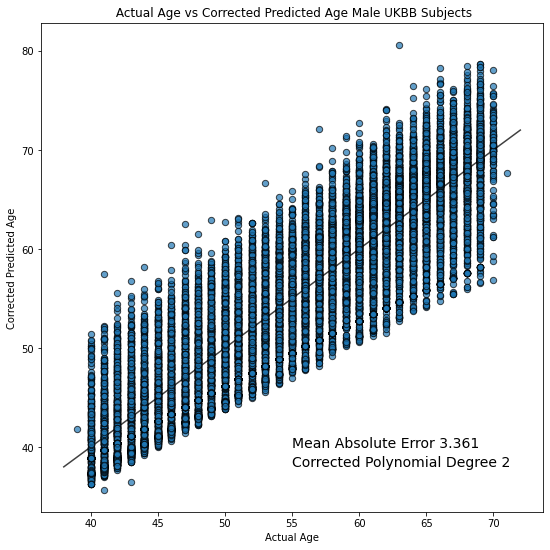

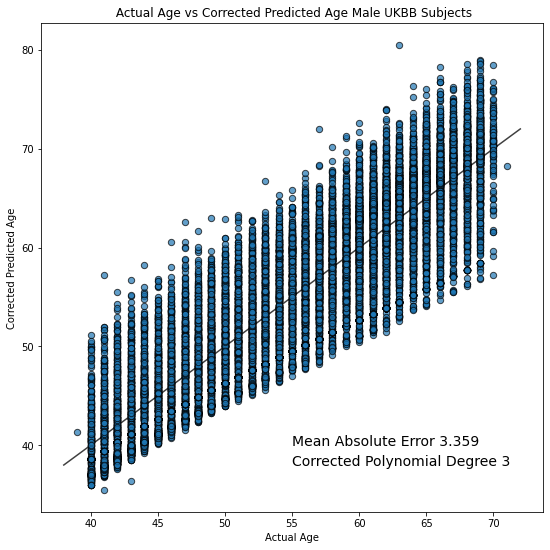

In [37]:
lin_corrected_age,b_model_out_lin = bias_correction(age_t = list(training_age_t),age_p1 = training_age_p1,degree = 1)

quad_corrected_age,b_model_out = bias_correction(age_t = list(training_age_t),age_p1 = training_age_p1,degree = 2)

poly_corrected_age,b_model_out_poly = bias_correction(age_t = list(training_age_t),age_p1 = training_age_p1,degree = 3)

Text(0.5, 1.0, ' Actual Age vs Corrected Predicted Age (UKBB Male Validation Data)')

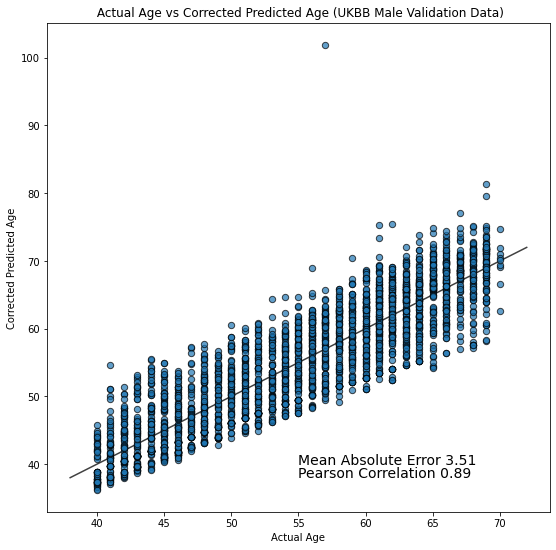

In [38]:
age_t = list(Y_male_ukbb_val)
age_p1 = best_mlp_male_model.predict(normalized_X_male_ukbb_val)
age_p2 = []
for i in range(0,len(age_t)):
    age_p2.append(b_model_out(age_t[i]))
age_pc = []
for i in range(0,len(age_t)):
    age_pc.append(age_p1[i] - age_p2[i] + age_t[i])

fig, ax = plt.subplots(figsize = (9, 9))
ax.scatter(age_t,age_pc,s=40, alpha=0.7, edgecolors="k")
#ax.plot(xseq, a + b * xseq + c*(xseq**2) +d*(xseq**3), color="k", lw=2.5)
ax.plot([38,72], [38,72], 'k-', alpha=0.75, zorder=0)
plt.xlabel('Actual Age')
plt.ylabel('Corrected Predicted Age')
sts= "Mean Absolute Error " + str(round(mean_absolute_error(age_t, age_pc),2))
plt.text(55, 40, sts, fontsize = 14)
sts= "Pearson Correlation " + str(round(pearsonr(age_t, age_pc)[0],2))
plt.text(55, 38, sts, fontsize = 14)
plt.title(' Actual Age vs Corrected Predicted Age (UKBB Male Validation Data)')

Text(0.5, 1.0, ' Actual Age vs Corrected Predicted Age (UKBB Male Test Data)')

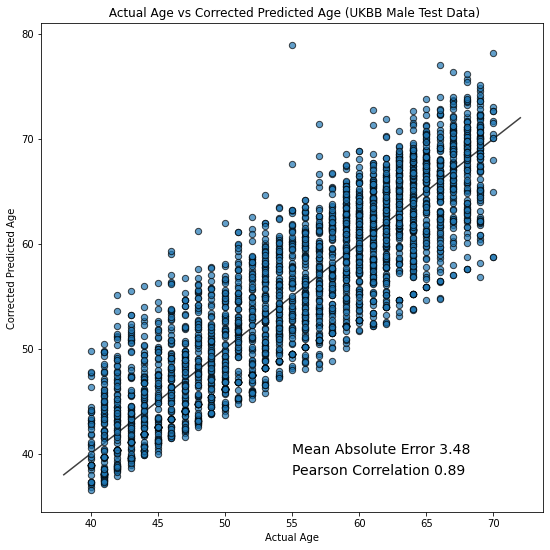

In [39]:
age_t = list(Y_male_ukbb_test)
age_p1 = best_mlp_male_model.predict(normalized_X_male_ukbb_test)
age_p2 = []
for i in range(0,len(age_t)):
    age_p2.append(b_model_out(age_t[i]))
age_pc = []
for i in range(0,len(age_t)):
    age_pc.append(age_p1[i] - age_p2[i] + age_t[i])

fig, ax = plt.subplots(figsize = (9, 9))
ax.scatter(age_t,age_pc,s=40, alpha=0.7, edgecolors="k")
#ax.plot(xseq, a + b * xseq + c*(xseq**2) +d*(xseq**3), color="k", lw=2.5)
ax.plot([38,72], [38,72], 'k-', alpha=0.75, zorder=0)
plt.xlabel('Actual Age')
plt.ylabel('Corrected Predicted Age')
sts= "Mean Absolute Error " + str(round(mean_absolute_error(age_t, age_pc),2))
plt.text(55, 40, sts, fontsize = 14)
sts= "Pearson Correlation " + str(round(pearsonr(age_t, age_pc)[0],2))
plt.text(55, 38, sts, fontsize = 14)
plt.title(' Actual Age vs Corrected Predicted Age (UKBB Male Test Data)')

In [40]:
round(mean_absolute_error(age_t, age_pc),2)

3.48

## Running male ADNI subjects based on male UKBB model and bias correction

	Mean Absolute Error Test 21.466801983570857
	PearsonCorrelation for Test (0.0662427686817483, 0.07987518990598329)


Text(0.5, 1.0, 'Predicted Age vs Actual Age: ADNI Controls and AD')

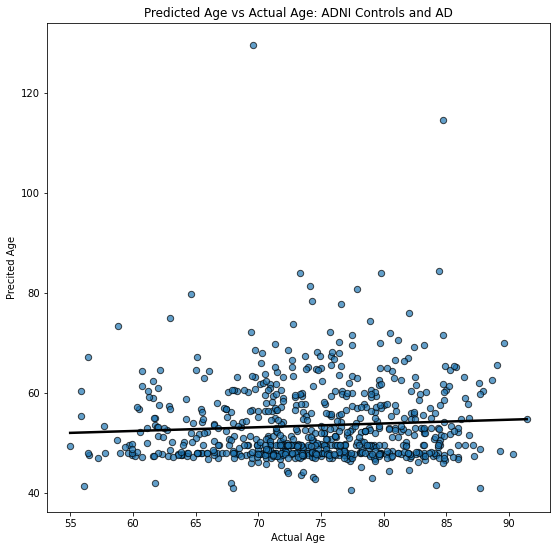

In [41]:
#normalized_male_adni_x
#male_adni_y

predicted_adni_male = best_mlp_male_model.predict(normalized_male_adni_x)
print("\tMean Absolute Error Test",mean_absolute_error(male_adni_y, predicted_adni_male))
from scipy.stats import pearsonr
print("\tPearsonCorrelation for Test",pearsonr(male_adni_y, predicted_adni_male))
predicted_dataframe = pd.DataFrame(list(zip(predicted_adni_male, male_adni_y)),index = male_adni_y.index, columns = ['Predicted_Age','Actual_Age'])
predicted_dataframe["Difference"] = predicted_dataframe["Predicted_Age"] - predicted_dataframe["Actual_Age"]

fig, ax = plt.subplots(figsize = (9, 9))

ax.scatter(list(predicted_dataframe['Actual_Age']),
                  list(predicted_dataframe['Predicted_Age']),s=40, alpha=0.7, edgecolors="k")
b, a = np.polyfit(list(predicted_dataframe['Actual_Age']),
                  list(predicted_dataframe['Predicted_Age']), deg=1)

xseq = np.linspace(min(predicted_dataframe['Actual_Age']),np.max(predicted_dataframe['Actual_Age']), num=100)
ax.plot(xseq, a + b * xseq, color="k", lw=2.5)

plt.xlabel('Actual Age')
plt.ylabel('Precited Age')
plt.title('Predicted Age vs Actual Age: ADNI Controls and AD')

In [42]:
age_t = list(predicted_dataframe["Actual_Age"])
age_p1 = list(predicted_dataframe["Predicted_Age"])
age_p2 = []
for i in range(0,len(age_t)):
    age_p2.append(b_model_out(age_t[i]))
age_pc = []
for i in range(0,len(age_t)):
    age_pc.append(age_p1[i] - age_p2[i] + age_t[i])
    
predicted_dataframe_adni = pd.DataFrame(list(zip(age_pc, age_t)),index = male_adni_y.index, columns = ['Corrected_Predicted_Age','Actual_Age'])
predicted_dataframe_adni['RID'] = list(predicted_dataframe_adni.index)
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(['AD','LMCI','EMCI','Controls'])
predicted_dataframe_adni['Diagnosis'] = le.transform(list(subj_info_2.Diagnosis[subj_info_2.Sample_id.isin(male_adni_x.index)]))
le.transform(['AD','LMCI','EMCI','Controls'])

le2 = preprocessing.LabelEncoder()
le2.fit(['Male','Female'])
predicted_dataframe_adni['Sex'] = le2.transform(list(subj_info_2.Sex[subj_info_2.Sample_id.isin(male_adni_x.index)]))
le2.transform(['Male','Female'])

array([1, 0])

Text(0.5, 1.0, 'Control Subjects using Polynomial Bias Model: Actual Age vs Corrected Predicted Age (Male ADNI Data)')

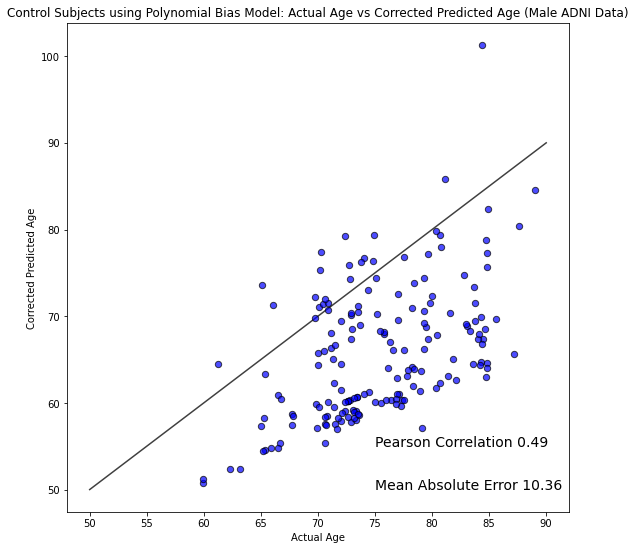

In [43]:
fig, ax = plt.subplots(figsize = (9, 9))
corrected_age_predict_disease_AD = predicted_dataframe_adni[predicted_dataframe_adni.Diagnosis == 1]
scatter = ax.scatter(list(corrected_age_predict_disease_AD['Actual_Age']),
                  list(corrected_age_predict_disease_AD['Corrected_Predicted_Age']),s=40, alpha=0.7, edgecolors="k",c = 'blue')

ax.plot([50,90], [50,90], 'k-', alpha=0.75, zorder=0)
plt.xlabel('Actual Age')
plt.ylabel('Corrected Predicted Age')
sts= "Mean Absolute Error " + str(round(mean_absolute_error(list(corrected_age_predict_disease_AD['Actual_Age']),
                                                            list(corrected_age_predict_disease_AD['Corrected_Predicted_Age'])),2))
plt.text(75, 50, sts, fontsize = 14)
sts= "Pearson Correlation " + str(round(pearsonr(list(corrected_age_predict_disease_AD['Actual_Age']),
                                                            list(corrected_age_predict_disease_AD['Corrected_Predicted_Age']))[0],2))
plt.text(75, 55, sts, fontsize = 14)
plt.title('Control Subjects using Polynomial Bias Model: Actual Age vs Corrected Predicted Age (Male ADNI Data)')

In [44]:
predicted_dataframe_adni.to_csv('Oct2023_Results/Predicted_Age_Male_ADNI_Population_QuadBias.csv')

# Female Subjects Model

In [20]:
bins = np.linspace(0, len(y_ukbb_female),20)
y_binned = np.digitize(y_ukbb_female, bins)
scaler = StandardScaler().fit(x_ukbb_female)
X_female_ukbb_train, X_female_ukbb_test, Y_female_ukbb_train, Y_female_ukbb_test = train_test_split(x_ukbb_female, y_ukbb_female,
        test_size=0.1, shuffle = True, random_state = 42,stratify=y_binned)

bins = np.linspace(0, len(Y_female_ukbb_train),20)
y_binned = np.digitize(Y_female_ukbb_train, bins)
X_female_ukbb_train, X_female_ukbb_val, Y_female_ukbb_train, Y_female_ukbb_val = train_test_split(X_female_ukbb_train, Y_female_ukbb_train,
        test_size=0.1, shuffle = True, random_state = 42,stratify=y_binned)

normalized_X_female_ukbb_train = pd.DataFrame(
  scaler.transform(X_female_ukbb_train),
  columns = x_ukbb_female.columns
  )
normalized_X_female_ukbb_test = pd.DataFrame(
  scaler.transform(X_female_ukbb_test),
  columns = x_ukbb_female.columns
  )
normalized_X_female_ukbb_val = pd.DataFrame(
  scaler.transform(X_female_ukbb_val),
  columns = x_ukbb_female.columns
  )

### Prepping the model

In [5]:
def mlp_regressor_objective_female(trial):
    hidden_layers = trial.suggest_categorical("hidden_layer_sizes", [(50,100),(100,100),(50,75,100),(25,75,100),(25,50,75,100)])
    activation = trial.suggest_categorical("activation", ["relu", "identity"])
    #solver = trial.suggest_categorical("solver", ["sgd", "adam"])
    learning_rate = trial.suggest_categorical("learning_rate", ['constant', 'invscaling', 'adaptive'])
    learning_rate_init = trial.suggest_float("learning_rate_init", 0.001, 0.01)
    momentum = trial.suggest_float('momentum',0.2,0.9)

    ## Create Model
    mlp_regressor = MLPRegressor(
                            hidden_layer_sizes=hidden_layers,
                            activation=activation,
                            #solver=solver,
                            momentum = momentum,
                            learning_rate=learning_rate,
                            learning_rate_init=learning_rate_init,
                            #early_stopping=True
                            )
    ## Fit Model

    mlp_regressor.fit(normalized_X_female_ukbb_train,Y_female_ukbb_train)

    mae = mean_absolute_error(Y_female_ukbb_val, mlp_regressor.predict(normalized_X_female_ukbb_val))

    return mae

studymlp_female = optuna.create_study(direction="minimize")
studymlp_female.optimize(mlp_regressor_objective_female, n_trials=500)

[I 2023-10-05 14:30:05,153] A new study created in memory with name: no-name-a339ba3e-2c3a-448f-be2e-a1ce1137af3a
C:\Users\ppugale\AppData\Roaming\Python\Python38\site-packages\optuna\distributions.py:427: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 100) which is of type tuple.
  warnings.warn(message)
C:\Users\ppugale\AppData\Roaming\Python\Python38\site-packages\optuna\distributions.py:427: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100, 100) which is of type tuple.
  warnings.warn(message)
C:\Users\ppugale\AppData\Roaming\Python\Python38\site-packages\optuna\distributions.py:427: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 75, 100) which is of type tuple.
  warnings.warn(message)
C:\Users

In [6]:
studymlp_female.best_params

{'hidden_layer_sizes': (25, 50, 75, 100),
 'activation': 'relu',
 'learning_rate': 'adaptive',
 'learning_rate_init': 0.008211544802815416,
 'momentum': 0.20283295369885226}

In [7]:
studymlp_female.best_value

5.122709896896645

{'hidden_layer_sizes': (25, 50, 75, 100),
 'activation': 'relu',
 'learning_rate': 'invscaling',
 'learning_rate_init': 0.009291658260193356}
<br>
MAE --> 5.036652664436009

### Best Female Model

In [21]:
## Running the best model for female

best_mlp_female_model = MLPRegressor(
                        hidden_layer_sizes=(25, 50, 75, 100),
                        activation='relu',
                        #solver=solver,
                        learning_rate='invscaling',
                        learning_rate_init= 0.008648252541110867,
                        #early_stopping=True
                        )

best_mlp_female_model.fit(normalized_X_female_ukbb_train,Y_female_ukbb_train)
import scipy
print('Pearson correlation for validation:',scipy.stats.pearsonr(Y_female_ukbb_val, best_mlp_female_model.predict(normalized_X_female_ukbb_val))[0])
print('Mean Absolute Error for validation:',mean_absolute_error(Y_female_ukbb_val, best_mlp_female_model.predict(normalized_X_female_ukbb_val)))

print('Pearson correlation for test:',scipy.stats.pearsonr(Y_female_ukbb_test, best_mlp_female_model.predict(normalized_X_female_ukbb_test))[0])
print('Mean Absolute Error for test:',mean_absolute_error(Y_female_ukbb_test, best_mlp_female_model.predict(normalized_X_female_ukbb_test)))


Pearson correlation for validation: 0.5877292863255953
Mean Absolute Error for validation: 5.3504145436782835
Pearson correlation for test: 0.6039946980507189
Mean Absolute Error for test: 5.177549257202443


Text(0.5, 1.0, ' Actual Age vs Predicted Age (Female UKBB Training)')

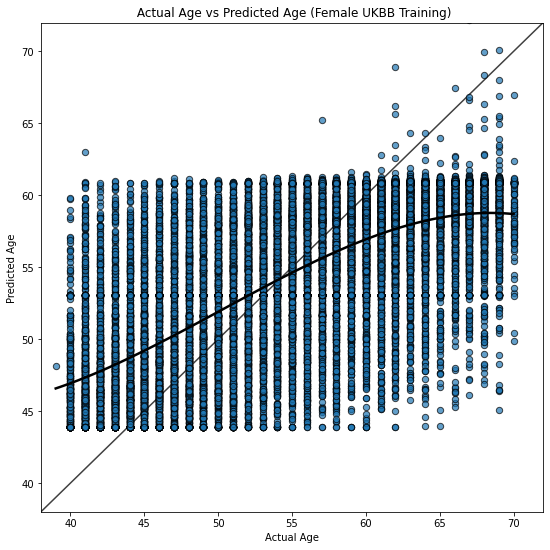

In [28]:
fig, ax = plt.subplots(figsize = (9, 9))
training_age_t = Y_female_ukbb_train
training_age_p1 = best_mlp_female_model.predict(normalized_X_female_ukbb_train)

ax.scatter(training_age_t,
                  training_age_p1,s=40, alpha=0.7, edgecolors="k")
d, c, b, a = np.polyfit(training_age_t,
                  training_age_p1,deg=3)

xseq = np.linspace(min(training_age_t),np.max(training_age_t), num=100)
ax.plot(xseq, a + b * xseq + c*(xseq**2) +d*(xseq**3), color="k", lw=2.5)
ax.plot([38,72], [38,72], 'k-', alpha=0.75, zorder=0)
plt.xlabel('Actual Age')
plt.ylabel('Predicted Age')
plt.xlim([38,72])
plt.ylim([38,72])
plt.title(' Actual Age vs Predicted Age (Female UKBB Training)')

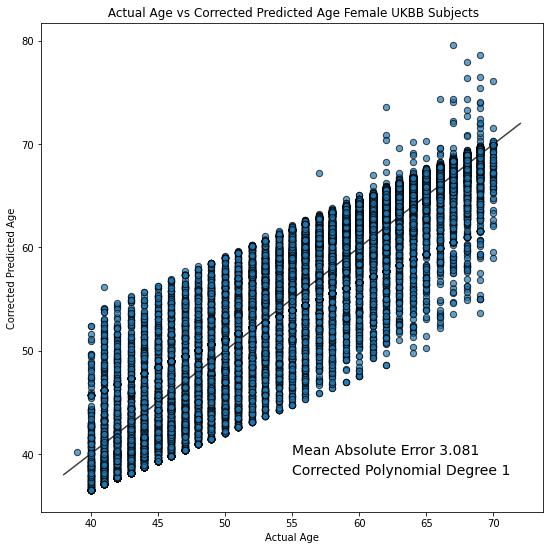

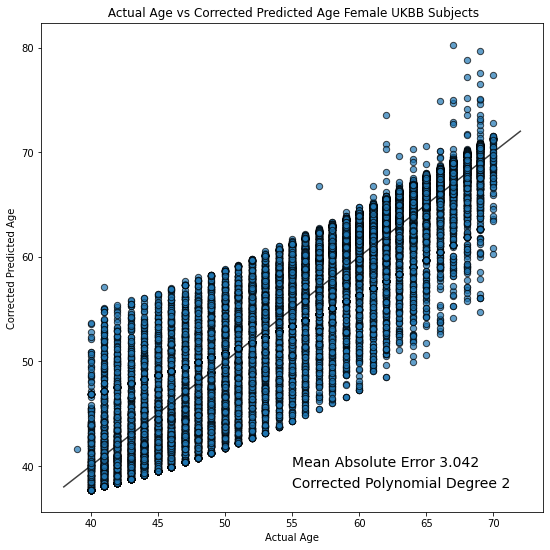

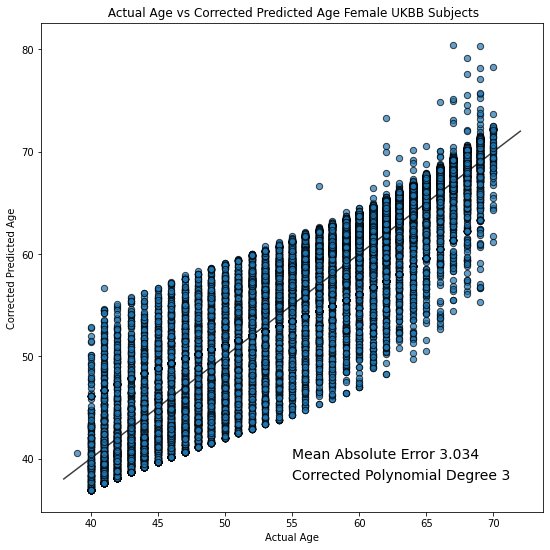

In [29]:
lin_corrected_age,b_model_out_lin = bias_correction(age_t = list(training_age_t),age_p1 = training_age_p1,degree = 1, title_set = 'Female UKBB Subjects' )

quad_corrected_age,b_model_out = bias_correction(age_t = list(training_age_t),age_p1 = training_age_p1,degree = 2, title_set = 'Female UKBB Subjects')

poly_corrected_age,b_model_out_poly = bias_correction(age_t = list(training_age_t),age_p1 = training_age_p1,degree = 3, title_set = 'Female UKBB Subjects')

Text(0.5, 1.0, ' Actual Age vs Corrected Predicted Age (UKBB Female Test Data)')

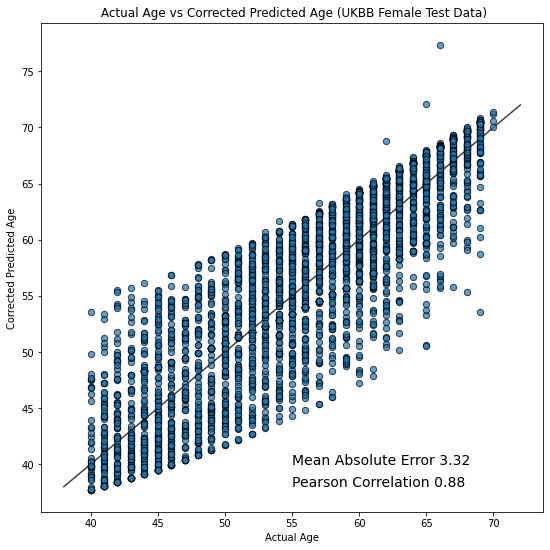

In [30]:
age_t = list(Y_female_ukbb_test)
age_p1 = best_mlp_female_model.predict(normalized_X_female_ukbb_test)
age_p2 = []
for i in range(0,len(age_t)):
    age_p2.append(b_model_out(age_t[i]))
age_pc = []
for i in range(0,len(age_t)):
    age_pc.append(age_p1[i] - age_p2[i] + age_t[i])

fig, ax = plt.subplots(figsize = (9, 9))
ax.scatter(age_t,age_pc,s=40, alpha=0.7, edgecolors="k")
#ax.plot(xseq, a + b * xseq + c*(xseq**2) +d*(xseq**3), color="k", lw=2.5)
ax.plot([38,72], [38,72], 'k-', alpha=0.75, zorder=0)
plt.xlabel('Actual Age')
plt.ylabel('Corrected Predicted Age')
sts= "Mean Absolute Error " + str(round(mean_absolute_error(age_t, age_pc),2))
plt.text(55, 40, sts, fontsize = 14)
sts= "Pearson Correlation " + str(round(pearsonr(age_t, age_pc)[0],2))
plt.text(55, 38, sts, fontsize = 14)
plt.title(' Actual Age vs Corrected Predicted Age (UKBB Female Test Data)')

## Running female ADNI subjects based on female UKBB model and bias correction

	Mean Absolute Error Test 16.000946349881342
	PearsonCorrelation for Test (0.12178001570254063, 0.0038048230512527192)


array([1, 0])

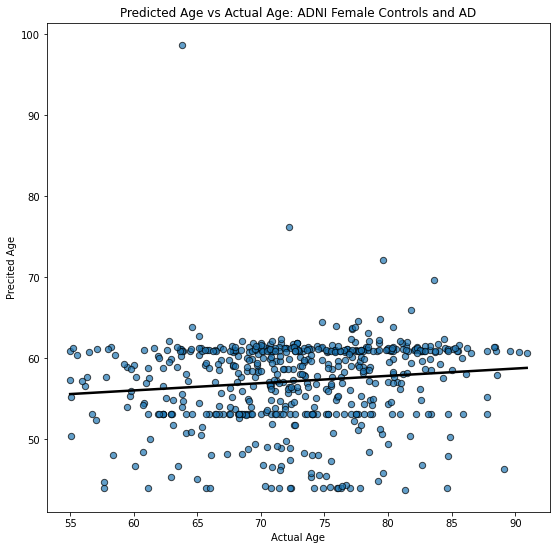

In [31]:
#normalized_female_adni_x
#female_adni_y

predicted_adni_female = best_mlp_female_model.predict(normalized_female_adni_x)
print("\tMean Absolute Error Test",mean_absolute_error(female_adni_y, predicted_adni_female))
from scipy.stats import pearsonr
print("\tPearsonCorrelation for Test",pearsonr(female_adni_y, predicted_adni_female))
predicted_dataframe = pd.DataFrame(list(zip(predicted_adni_female, female_adni_y)),index = female_adni_y.index, columns = ['Predicted_Age','Actual_Age'])
predicted_dataframe["Difference"] = predicted_dataframe["Predicted_Age"] - predicted_dataframe["Actual_Age"]

fig, ax = plt.subplots(figsize = (9, 9))

ax.scatter(list(predicted_dataframe['Actual_Age']),
                  list(predicted_dataframe['Predicted_Age']),s=40, alpha=0.7, edgecolors="k")
b, a = np.polyfit(list(predicted_dataframe['Actual_Age']),
                  list(predicted_dataframe['Predicted_Age']), deg=1)

xseq = np.linspace(min(predicted_dataframe['Actual_Age']),np.max(predicted_dataframe['Actual_Age']), num=100)
ax.plot(xseq, a + b * xseq, color="k", lw=2.5)

plt.xlabel('Actual Age')
plt.ylabel('Precited Age')
plt.title('Predicted Age vs Actual Age: ADNI Female Controls and AD')


age_t = list(predicted_dataframe["Actual_Age"])
age_p1 = list(predicted_dataframe["Predicted_Age"])
age_p2 = []
for i in range(0,len(age_t)):
    age_p2.append(b_model_out(age_t[i]))
age_pc = []
for i in range(0,len(age_t)):
    age_pc.append(age_p1[i] - age_p2[i] + age_t[i])
    
predicted_dataframe_adni = pd.DataFrame(list(zip(age_pc, age_t)),index = female_adni_y.index, columns = ['Corrected_Predicted_Age','Actual_Age'])
predicted_dataframe_adni['RID'] = list(predicted_dataframe_adni.index)
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(['AD','LMCI','EMCI','Controls'])
predicted_dataframe_adni['Diagnosis'] = le.transform(list(subj_info_2.Diagnosis[subj_info_2.Sample_id.isin(female_adni_x.index)]))
le.transform(['AD','LMCI','EMCI','Controls'])

le2 = preprocessing.LabelEncoder()
le2.fit(['Male','Female'])
predicted_dataframe_adni['Sex'] = le2.transform(list(subj_info_2.Sex[subj_info_2.Sample_id.isin(female_adni_x.index)]))
le2.transform(['Male','Female'])

Text(0.5, 1.0, 'Control Subjects using Polynomial Bias Model: Actual Age vs Corrected Predicted Age (Female ADNI Data)')

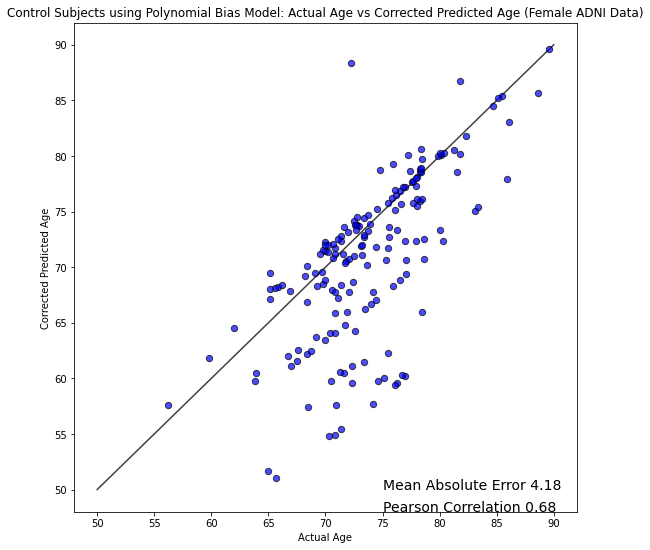

In [32]:
fig, ax = plt.subplots(figsize = (9, 9))
corrected_age_predict_disease_AD = predicted_dataframe_adni[predicted_dataframe_adni.Diagnosis == 1]
scatter = ax.scatter(list(corrected_age_predict_disease_AD['Actual_Age']),
                  list(corrected_age_predict_disease_AD['Corrected_Predicted_Age']),s=40, alpha=0.7, edgecolors="k",c = 'blue')

ax.plot([50,90], [50,90], 'k-', alpha=0.75, zorder=0)
plt.xlabel('Actual Age')
plt.ylabel('Corrected Predicted Age')
sts= "Mean Absolute Error " + str(round(mean_absolute_error(list(corrected_age_predict_disease_AD['Actual_Age']),
                                                            list(corrected_age_predict_disease_AD['Corrected_Predicted_Age'])),2))
plt.text(75, 50, sts, fontsize = 14)
sts= "Pearson Correlation " + str(round(pearsonr(list(corrected_age_predict_disease_AD['Actual_Age']),
                                                            list(corrected_age_predict_disease_AD['Corrected_Predicted_Age']))[0],2))
plt.text(75, 48, sts, fontsize = 14)
plt.title('Control Subjects using Polynomial Bias Model: Actual Age vs Corrected Predicted Age (Female ADNI Data)')

In [33]:
predicted_dataframe_adni.to_csv('Oct2023_Results/Predicted_Age_Female_ADNI_Population_QuadBias.csv')